In [1]:
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from collections import OrderedDict
import pylab
import seaborn as sns
import scipy.stats as stats
import math
import json

import sympy as sp
sp.init_printing() 

In [4]:
def combine_records(pole, direction):
    directories = os.listdir('./data')

    df_combined = pd.DataFrame(columns=['x', 'y', 'theta'])

    for _, d in enumerate(directories):
        dir_path = "./data/{}".format(d)
        if os.path.isdir(dir_path):
            file_path = "{}/organized/{}_{}.csv".format(dir_path, pole, direction)

            df = pd.read_csv(file_path, header=None, names=["x", "y", "theta"])
            df_combined = df_combined.append(df,ignore_index = True)

    return df_combined
        

In [8]:
def plot_pose(point, angle, marker,color, length=0.5, label = ""):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = y+(length * math.sin(angle))
    endx = x+(length * math.cos(angle))
    
    plt.plot([x, endx], [y, endy],color = color,label=label + ' pose')

def plot_data(df, gt_end, title='', show=True, c ='y',l='observed'):
    # measured pose
    plt.scatter(df.x.values, df.y.values, marker='o', color=c)
    for index, row in df.iterrows():
        plot_pose((row['x'], row['y']), angle=row['theta'], marker='o', color=c, label = l)

    # end pose
    plt.scatter(gt_end[0], gt_end[1], marker='o', color='r')
    plot_pose(point=(gt_end[0], gt_end[1]), angle=gt_end[2],marker='o',color='r',label = 'Expected')
    
    # Initial pose
    plt.scatter(-85.41, -55.60, marker='o', color='g')
    plot_pose(point=(-85.41, -55.60), angle=1.38,marker='o',color='g',label = 'Initial')

    plt.rcParams["figure.figsize"] = (12,6)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(title)
    plt.xlabel("X-axis (cm)")
    plt.ylabel("Y-axis (cm)")
    plt.grid(True)
    
    if(show):
        plt.show()

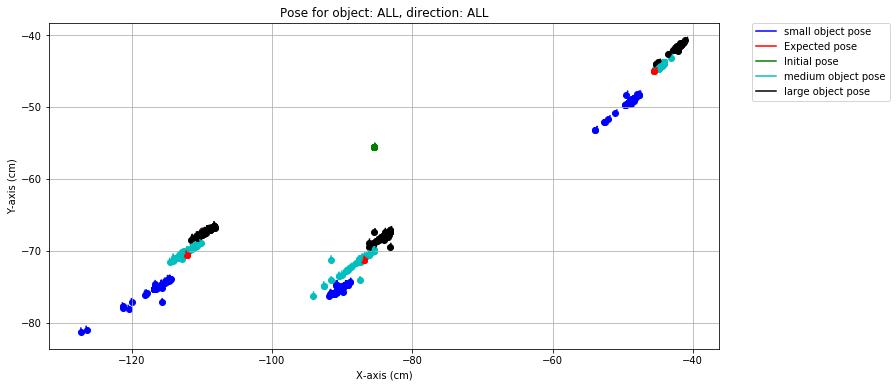

In [10]:
# For data from all groups

poles = ['small', 'medium', 'large']
directions = ['straight', 'left', 'right']
gt = [[-86.89, -71.31, 1.45], [-45.47, -45.00, 0.88], [-112.13, -70.58, 1.78]]
colours = ['b','c','k']

df_all = pd.DataFrame(columns=['size', 'direction', 'x', 'y', 'theta'])

for i, pole in enumerate(poles):
    for ind, direction in enumerate(directions):
        df = combine_records(pole, direction)
        
        # Save data
        output_path = './pre-processed_2/{}_{}.csv'.format(pole, direction)
        df.to_csv(output_path)
        
        x_mean = np.mean(df.x.values)
        y_mean = np.mean(df.y.values)
        theta_mean = np.mean(df.theta.values)
        
        df_all = df_all.append({'size': pole, 'direction': direction, 'x': x_mean, 'y': y_mean, 'theta': theta_mean}, ignore_index=True)
        
        # Plot data
        title=''
        plot_data(df, (gt[ind][0], gt[ind][1], gt[ind][2]), c=colours[i]  ,show=False, l='{} object'.format(pole))


plt.title('Pose for object: ALL, direction: ALL')
plt.show()

